# Area Plot, Histograms, and Bar Charts

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.4.3


In [2]:
df_canada = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

In [3]:
df_canada.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
df_canada.shape

(195, 39)

In [5]:
df_canada.set_index('Country', inplace=True)

In [6]:
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [7]:
df_canada.shape

(195, 38)

In [8]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Area plot

In [9]:
df_canada.sort_values(['Total'], ascending=False, axis=0, inplace=True)

df_top5 = df_canada.head()

df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


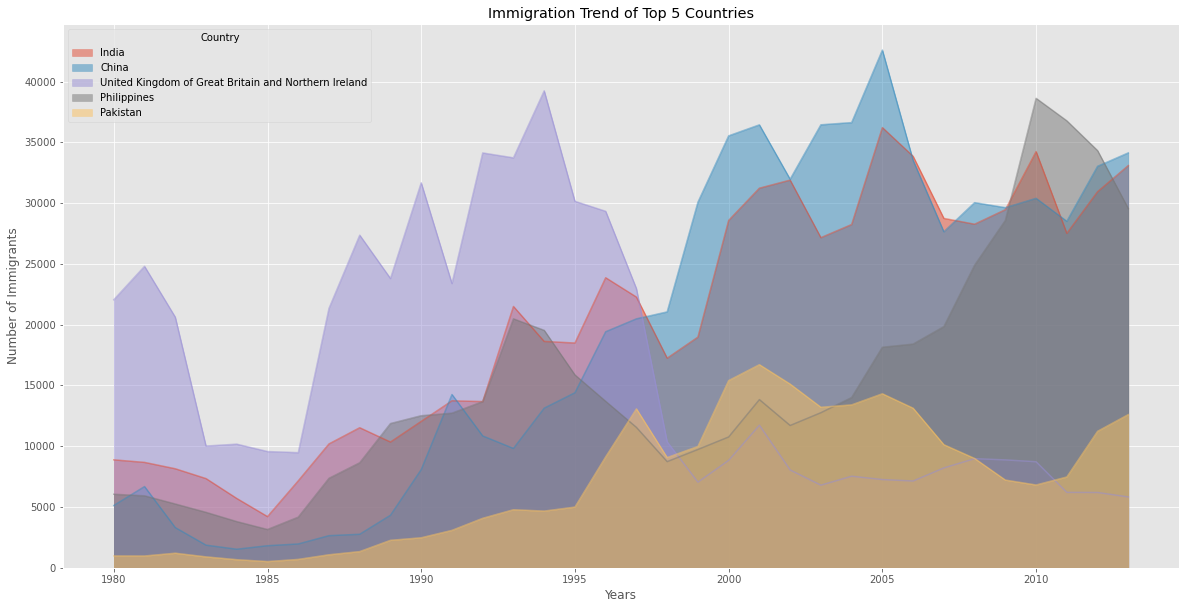

In [10]:
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
            stacked=False,
            figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

# Scripting Layer with transparency val of 0.45

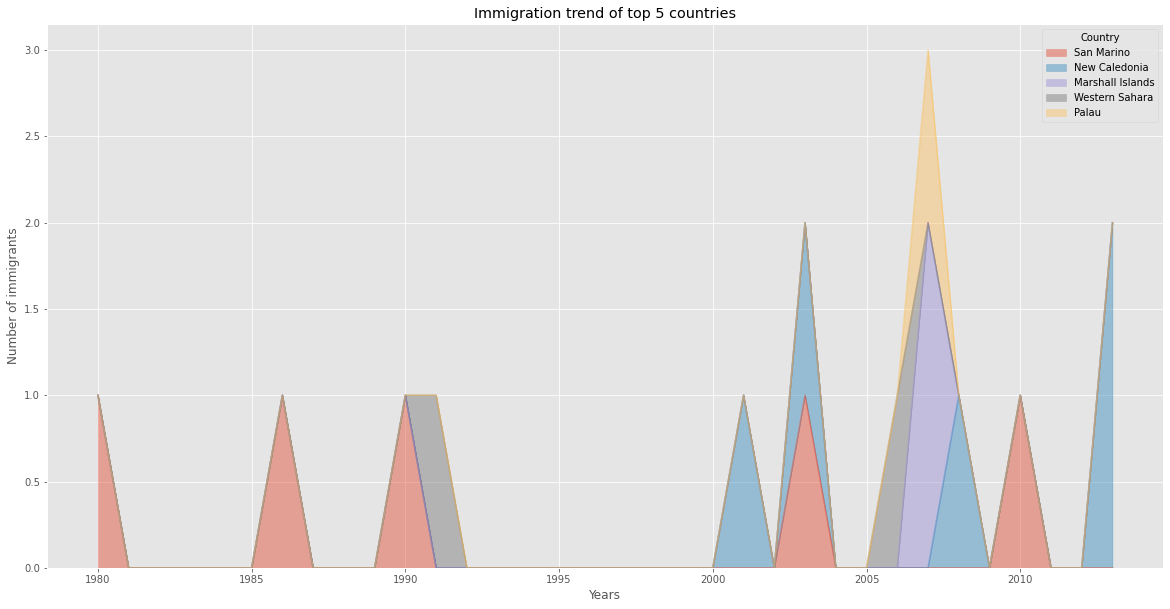

In [11]:
df_bottom5 = df_canada.tail(5)

df_bottom5 = df_bottom5[years].transpose()

df_bottom5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 
plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
    
plt.show()

Text(0.5, 0, 'Years')

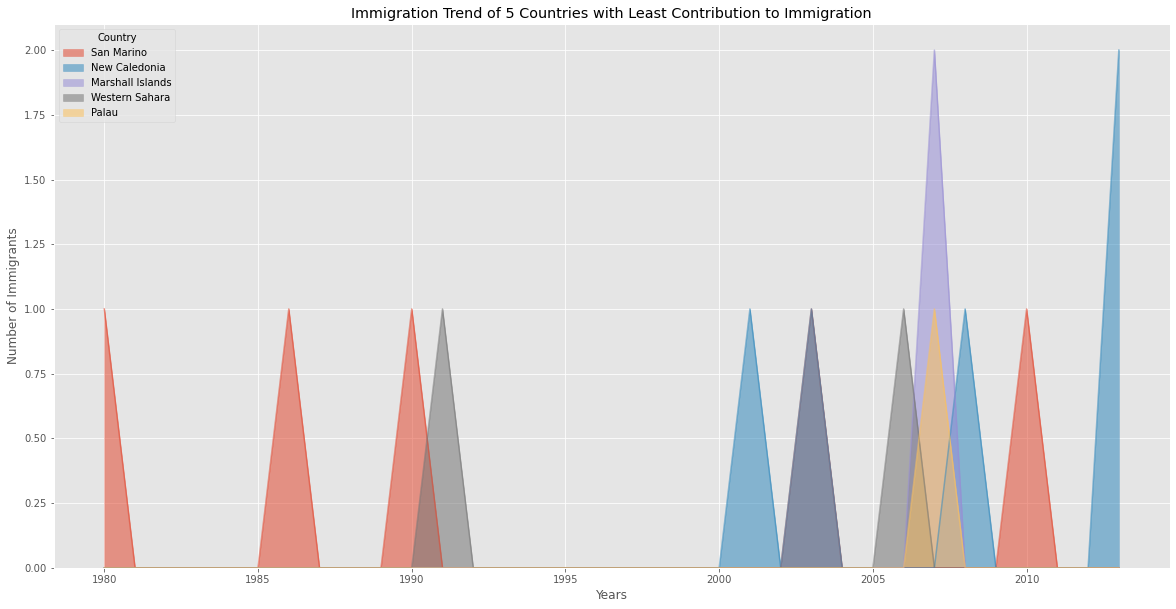

In [12]:
df_bottom5 = df_canada.tail(5)

# transpose the dataframe
df_bottom5 = df_bottom5[years].transpose() 
    
df_bottom5.index = df_bottom5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
    
ax = df_bottom5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))    
ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

# Histograms

In [13]:
df_canada['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [14]:
count, bin_edges = np.histogram(df_canada['2013'])
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


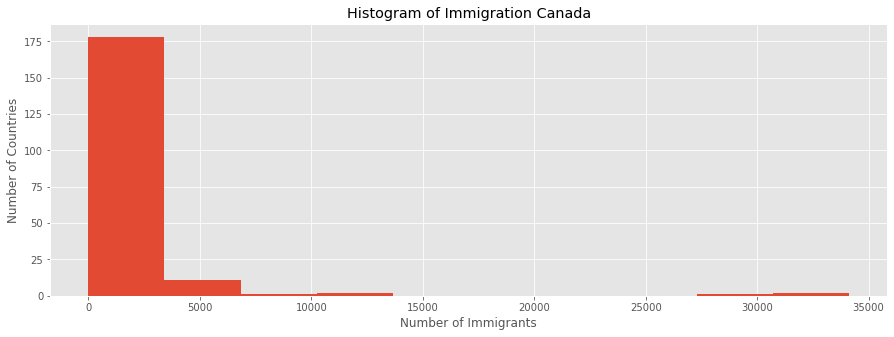

In [15]:
df_canada['2013'].plot(kind='hist', figsize=(15, 5))

plt.title('Histogram of Immigration Canada')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.show()

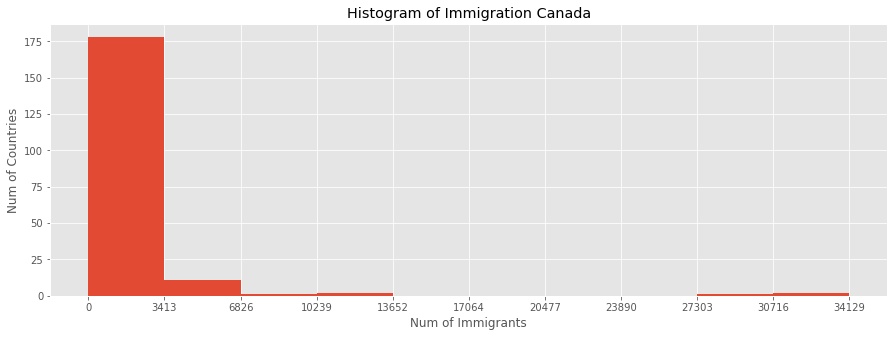

In [16]:
count, bin_edges = np.histogram(df_canada['2013'])

df_canada['2013'].plot(kind='hist', figsize=(15, 5), xticks=bin_edges)

plt.title('Histogram of Immigration Canada')
plt.ylabel('Num of Countries')
plt.xlabel('Num of Immigrants')
plt.show()


# What is the immigration distribution for Denmark, Norway, and Sweden for years 1980-2013?

In [17]:
df_canada.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<AxesSubplot:ylabel='Frequency'>

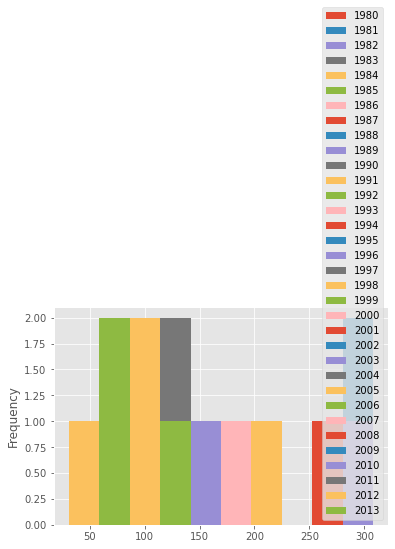

In [18]:
df_canada.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

In [19]:
df_t = df_canada.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


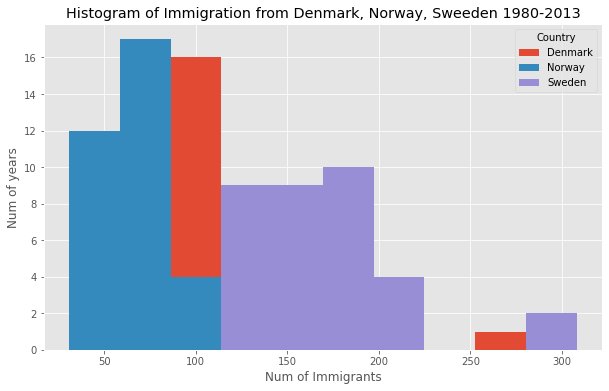

In [20]:
df_t.plot(kind='hist', figsize=(10, 6))
plt.title('Histogram of Immigration from Denmark, Norway, Sweeden 1980-2013')
plt.ylabel('Num of years')
plt.xlabel('Num of Immigrants')
plt.show()

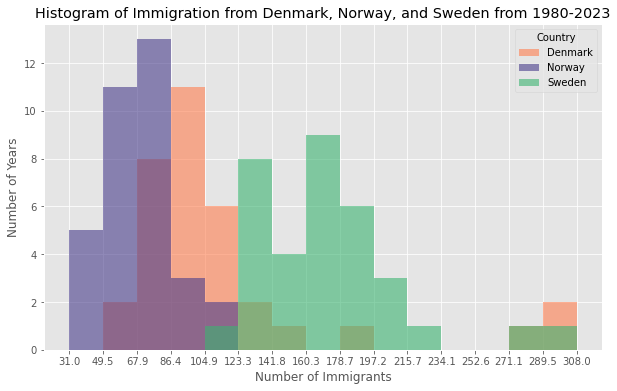

In [21]:
count, bin_edges = np.histogram(df_t, 15)

df_t.plot(kind='hist',
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
         color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980-2023')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

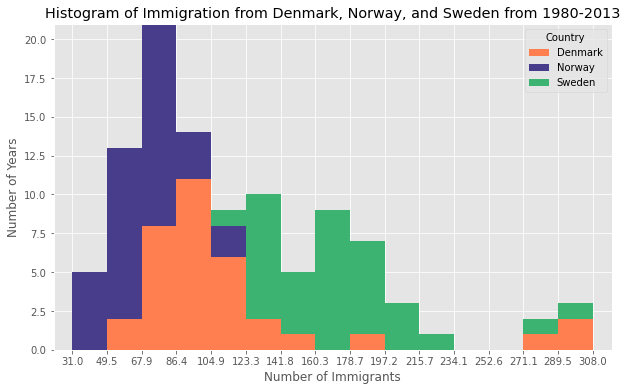

In [22]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10 
xmax = bin_edges[-1] + 10

# stacked Histogram
df_t.plot(kind='hist',
         figsize=(10, 6),
         bins=15,
         xticks=bin_edges,
         color=['coral', 'darkslateblue', 'mediumseagreen'],
         stacked=True,
         xlim=(xmin, xmax))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

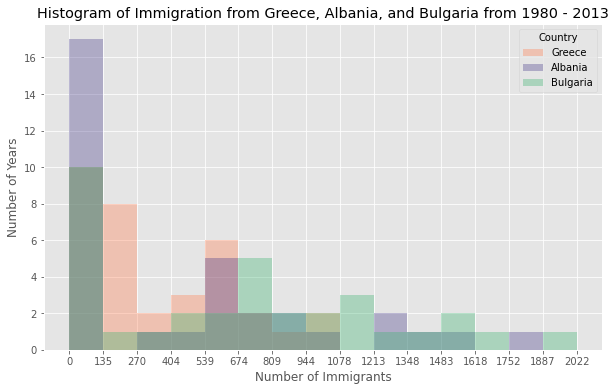

In [33]:
df_gab = df_canada.loc[['Greece', 'Albania', 'Bulgaria'], years]

# transpose the dataframe
df_gab = df_gab.transpose() 

count, bin_edges = np.histogram(df_gab, 15)

# Un-stacked Histogram
df_gab.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
            xticks=bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen']
            )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

In [34]:
df_i = df_canada.loc['Iceland', years]
df_i.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

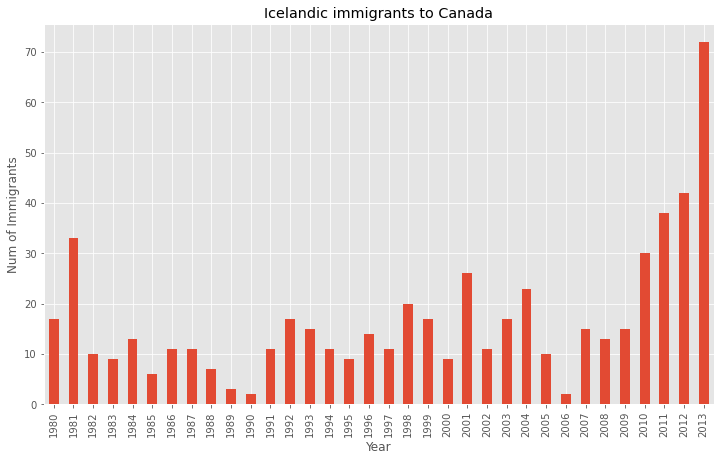

In [36]:
df_i.plot(kind='bar', figsize=(12, 7))

plt.xlabel('Year')
plt.ylabel('Num of Immigrants')
plt.title('Icelandic immigrants to Canada')
plt.show()

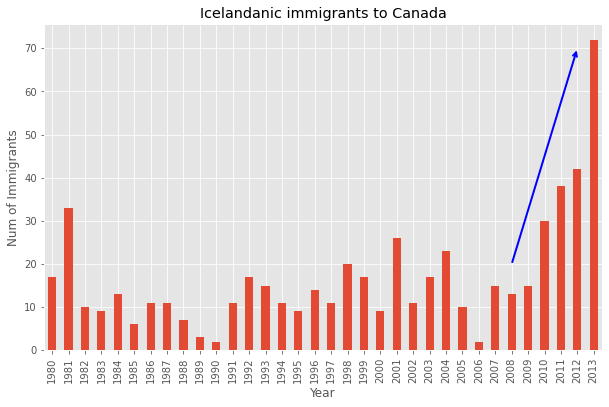

In [39]:
df_i.plot(kind='bar', figsize=(10,6), rot=90)

plt.xlabel('Year')
plt.ylabel('Num of Immigrants')
plt.title('Icelandanic immigrants to Canada')

plt.annotate('',
            xy=(32, 70),
            xytext=(28, 20),
            xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.show()

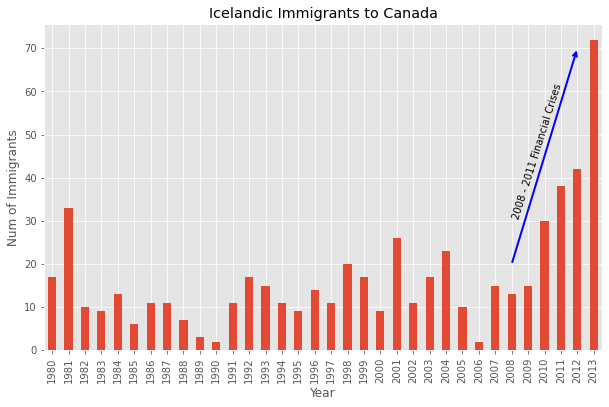

In [42]:
df_i.plot(kind='bar', figsize=(10,6), rot=90)
plt.xlabel('Year')
plt.ylabel('Num of Immigrants')
plt.title('Icelandic Immigrants to Canada')

plt.annotate('',
            xy=(32, 70),
            xytext=(28, 20),
            xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.annotate('2008 - 2011 Financial Crises',
             xy=(28,30),
             rotation=72.5,
             va='bottom',
             ha='left')
plt.show()

In [43]:
df_canada.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_canada['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

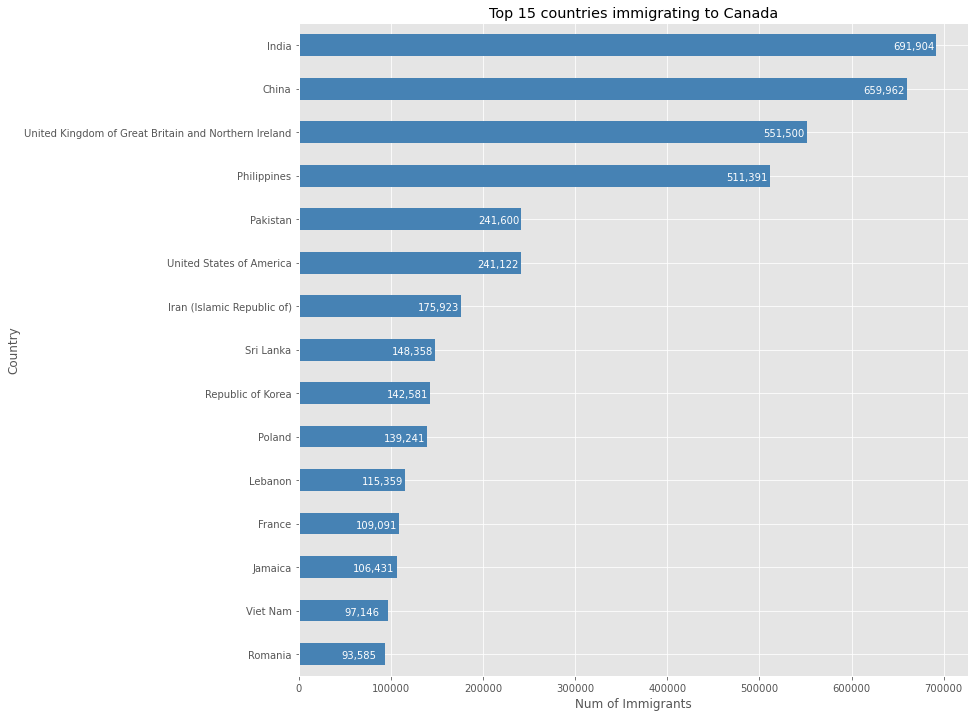

In [45]:
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Num of Immigrants')
plt.title('Top 15 countries immigrating to Canada')

for idx, val in enumerate(df_top15):
    label = format(int(val), ',')
    # fitting purposes
    plt.annotate(label, xy=(val - 47000, idx - 0.10), color='white')
    
plt.show()